In [6]:
import pandas as pd
import os
import glob

folder_path = r"C:\Users\yeye0\Desktop\천안시"
excel_files = glob.glob(os.path.join(folder_path, "**", "*.xlsx"), recursive=True)

print("총 엑셀 파일 개수:", len(excel_files))

for file in excel_files:
    try:
        # 앞의 3행은 건너뛰고 읽기
        df = pd.read_excel(file, skiprows=3)
        csv_file = file.replace(".xlsx", ".csv")

        try:
            # 1차 시도: cp949
            df.to_csv(csv_file, index=False, encoding="cp949")
        except UnicodeEncodeError:
            # 2차 시도: utf-8-sig
            df.to_csv(csv_file, index=False, encoding="utf-8-sig")

        print(f"변환 완료: {csv_file}")

    except Exception as e:
        print(f"에러 발생: {file} -> {e}")

print("✅ 모든 엑셀 파일을 CSV로 변환 완료!")

총 엑셀 파일 개수: 25
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\[2024년] 7월말 인구 현황\7월 인구현황(게시용).csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\[2024년] 7월말 인구 현황\연령별인구현황(2024.7월)-게시용.csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\[2025년] 7월말 인구 현황\7월 인구현황(게시용).csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\[2025년] 7월말 인구 현황\연령별인구현황(2025.7월)-게시용.csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\［2021년］7월말 인구 현황\7월 인구현황(게시용).csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\［2021년］7월말 인구 현황\연령별인구현황(2021.7월)-게시용.csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\［2022년］7월말 인구 현황\7월 인구현황(게시용).csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\［2022년］7월말 인구 현황\연령별인구현황(2022.07월)-게시용.csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\［2023년］7월말 인구 현황\7월 인구현황(게시용).csv
변환 완료: C:\Users\yeye0\Desktop\천안시\인구\［2023년］7월말 인구 현황\연령별인구현황(2023.7월)-게시용.csv
변환 완료: C:\Users\yeye0\Desktop\천안시\학교\대학\신입생 충원 현황 (대학)_2020.csv
에러 발생: C:\Users\yeye0\Desktop\천안시\학교\대학\신입생 충원 현황 (대학)_2021.xlsx -> [Errno 13] Permission denied: 'C:\\Users\\yeye0\\Desktop\\천안시\\학교\\대학\\신입생 충원 현황 (대학)_2021.csv'
변환

In [7]:
import pandas as pd
import glob
import os

# (학교명, 학교종류) 조건 리스트
target_conditions = [
    ("연암대학교", "전문대학"),
    ("백석문화대학교", "전문대학"),
    ("국립공주대학교 테크노융합대학원", "대학원"),
    ("고신대학교 신학대학원", "대학원"),
    ("글로벌사이버대학교", "대학"),
    ("나사렛대학교", "대학"),
    ("남서울대학교", "대학"),
    ("단국대학교", "대학"),
    ("상명대학교", "대학"),
    ("한국기술교육대학교", "대학"),
    ("한국기술교육대학교 테크노인력개발전문대", "대학원")
]

# CSV 파일 경로
path = r"C:\Users\yeye0\Desktop\천안시\**\*.csv"
files = glob.glob(path, recursive=True)

yearly_data = {}

for file in files:
    year = os.path.basename(file).split("_")[-1].replace(".csv", "")

    # CSV 불러오기
    try:
        df = pd.read_csv(file, encoding="utf-8")
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding="cp949")

    # 필요한 컬럼이 있는지 확인
    if not {"학교명", "학교종류"}.issubset(df.columns):
        print(f"⚠️ {file} → 학교명/학교종류 컬럼 없음")
        continue

    # 문자열 공백 제거
    df["학교명"] = df["학교명"].astype(str).str.strip()
    df["학교종류"] = df["학교종류"].astype(str).str.strip()

    # 조건 필터링
    mask = pd.DataFrame(False, index=df.index, columns=["match"])
    for school, gubun in target_conditions:
        mask["match"] |= (df["학교명"] == school) & (df["학교종류"] == gubun)

    filtered_df = df[mask["match"]]

    if filtered_df.empty:
        print(f"⚠️ {file} ({year}) → 조건에 맞는 데이터 없음")

    if year not in yearly_data:
        yearly_data[year] = filtered_df
    else:
        yearly_data[year] = pd.concat([yearly_data[year], filtered_df], ignore_index=True)

# 저장
output_dir = r"C:\Users\yeye0\Desktop\천안시"
for year, df in yearly_data.items():
    if not df.empty:
        output_file = os.path.join(output_dir, f"신입생 충원 현황_{year}_filtered.csv")
        df.to_csv(output_file, index=False, encoding="utf-8-sig")
        print(f"저장 완료: {output_file}")
    else:
        print(f"⚠️ {year}년도 데이터 없음")

⚠️ C:\Users\yeye0\Desktop\천안시\전국대학및전문대학정보표준데이터.csv → 학교명/학교종류 컬럼 없음
⚠️ C:\Users\yeye0\Desktop\천안시\전처리및제외지역.csv → 학교명/학교종류 컬럼 없음
⚠️ C:\Users\yeye0\Desktop\천안시\중복제거.csv → 학교명/학교종류 컬럼 없음


EmptyDataError: No columns to parse from file

In [ ]:
df = pd.read_csv(r"C:\Users\yeye0\Desktop\천안시\대학원\신입생 충원 현황 (대학원)_2020.csv")
print(df.head(10))


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yeye0\\Desktop\\천안시\\대학원\\신입생 충원 현황 (대학원)_2020.csv'

In [ ]:
df = pd.read_csv(file, header=None, encoding="cp949")  # header=None로 전체 확인
print(df.head(10))


EmptyDataError: No columns to parse from file

In [ ]:
print(df[["학교명", "학교종류"]].head(10))

Empty DataFrame
Columns: [학교명, 학교종류]
Index: []


In [ ]:
school_name = df["학교명"].str.replace(r"[\s\(\)]", "", regex=True)
school_type = df["학교종류"].str.replace(r"[\s]", "", regex=True)

mask = pd.Series(False, index=df.index)
for school, gubun in target_conditions:
    school_clean = school.replace(" ", "")
    gubun_clean = gubun.replace(" ", "")
    mask |= (school_name == school_clean) & (school_type == gubun_clean)


In [ ]:
if filtered_df.empty:
    print(df[["학교명", "학교종류"]].head(10))  # 확인용


Empty DataFrame
Columns: [학교명, 학교종류]
Index: []


In [ ]:
import pandas as pd
import glob
import os

# 필터링 조건 (학교명, 학교종류)
target_conditions = [
    ("연암대학교", "전문대학"),
    ("백석문화대학교", "전문대학"),
    ("국립공주대학교 테크노융합대학", "대학"),
    ("고신대학교 신학대학원", "대학원"),
    ("글로벌사이버대학교", "대학"),
    ("나사렛대학교", "대학"),
    ("남서울대학교", "대학"),
    ("단국대학교", "대학"),
    ("상명대학교", "대학"),
    ("한국기술교육대학교", "대학"),
    ("한국기술교육대학교 테크노인력개발전문대", "대학원")
]

# CSV 경로
path = r"C:\Users\yeye0\Desktop\천안시\**\*.csv"
files = glob.glob(path, recursive=True)

yearly_data = {}

for file in files:
    # 파일명에서 연도 추출
    basename = os.path.basename(file)
    year = basename.split("_")[-1].replace(".csv", "")

    # CSV 읽기 (헤더 없음으로)
    try:
        df = pd.read_csv(file, header=None, encoding="utf-8")
    except:
        df = pd.read_csv(file, header=None, encoding="cp949")

    # 헤더 행 탐색 (학교명 포함)
    for i in range(5):
        row = df.iloc[i].astype(str).str.strip()
        if any("학교" in x or "대학원" in x for x in row):
            df.columns = row
            df = df[i+1:].reset_index(drop=True)
            break

    # 컬럼 통일
    if "학교" in df.columns:
        df.rename(columns={"학교": "학교명"}, inplace=True)
    elif "대학원명" in df.columns:
        df.rename(columns={"대학원명": "학교명"}, inplace=True)
    elif "학교명" not in df.columns:
        print(f"⚠️ {file} → 학교명 컬럼 없음")
        continue

    # 학교종류 없으면 파일명 기반으로 생성
    if "학교종류" not in df.columns:
        fname_lower = file.lower()
        if "대학원" in fname_lower:
            df["학교종류"] = "대학원"
        elif "전문대" in fname_lower:
            df["학교종류"] = "전문대학"
        else:
            df["학교종류"] = "대학"

    # 공백 제거
    df["학교명"] = df["학교명"].astype(str).str.strip()
    df["학교종류"] = df["학교종류"].astype(str).str.strip()

    # 필터링
    mask = pd.Series(False, index=df.index)
    for school, gubun in target_conditions:
        mask |= (df["학교명"] == school) & (df["학교종류"] == gubun)

    filtered_df = df[mask]

    if filtered_df.empty:
        print(f"⚠️ {file} ({year}) → 조건에 맞는 데이터 없음")

    # 연도별 데이터 합치기
    if year not in yearly_data:
        yearly_data[year] = filtered_df
    else:
        yearly_data[year] = pd.concat([yearly_data[year], filtered_df], ignore_index=True)

# 연도별 CSV 저장
output_dir = r"C:\Users\yeye0\Desktop\천안시"
os.makedirs(output_dir, exist_ok=True)
for year, df in yearly_data.items():
    if not df.empty:
        output_file = os.path.join(output_dir, f"신입생 충원 현황_{year}_filtered.csv")
        df.to_csv(output_file, index=False, encoding="utf-8-sig")
        print(f"✅ 저장 완료: {output_file}")
    else:
        print(f"⚠️ {year}년도 데이터 없음")


⚠️ C:\Users\yeye0\Desktop\천안시\대학\신입생 충원 현황 (대학)_2020.csv (2020) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학\신입생 충원 현황 (대학)_2021.csv (2021) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학\신입생 충원 현황 (대학)_2022.csv (2022) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학\신입생 충원 현황 (대학)_2023.csv (2023) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학\신입생 충원 현황 (대학)_2024.csv (2024) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학원\신입생 충원 현황 (대학원)_2020.csv (2020) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학원\신입생 충원 현황 (대학원)_2021.csv (2021) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학원\신입생 충원 현황 (대학원)_2022.csv (2022) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학원\신입생 충원 현황 (대학원)_2023.csv (2023) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\대학원\신입생 충원 현황 (대학원)_2024.csv (2024) → 조건에 맞는 데이터 없음
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_전국대학및전문대학정보표준데이터_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_전처리및제외지역_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_

In [ ]:
# 공백 제거, 줄바꿈 제거, 소문자화
df["학교명"] = df["학교명"].astype(str).str.replace(" ", "").str.replace("\n", "").str.lower()
df["학교종류"] = df["학교종류"].astype(str).str.replace(" ", "").str.replace("\n", "").str.lower()

target_conditions_clean = [(s.replace(" ", "").lower(), g.replace(" ", "").lower()) for s, g in target_conditions]

mask = pd.Series(False, index=df.index)
for school, gubun in target_conditions_clean:
    mask |= (df["학교명"] == school) & (df["학교종류"] == gubun)


In [ ]:
import pandas as pd
import glob
import os

# 필터링 조건 (학교명, 학교종류)
target_conditions = [
    ("연암대학교", "전문대학"),
    ("백석문화대학교", "전문대학"),
    ("국립공주대학교 대학원", "일반대학원"),
    ("고신대학교 신학대학원", "특수대학원"),
    ("글로벌사이버대학교", "사이버대학(대학)"),
    ("나사렛대학교", "대학교"),
    ("남서울대학교", "대학교"),
    ("단국대학교 _제2캠퍼스", "대학교"),
    ("상명대학교 _제2캠퍼스", "대학교"),
    ("한국기술교육대학교", "대학교"),
    ("한국기술교육대학교 대학원 ", "일반대학원")
]

# CSV 경로
path = r"C:\Users\yeye0\Desktop\천안시\**\*.csv"
files = glob.glob(path, recursive=True)

yearly_data = {}

for file in files:
    # 파일명에서 연도 추출
    basename = os.path.basename(file)
    year = basename.split("_")[-1].replace(".csv", "")

    # CSV 읽기
    try:
        df = pd.read_csv(file, header=None, encoding="utf-8")
    except:
        df = pd.read_csv(file, header=None, encoding="cp949")

    # 헤더 행 탐색 (학교명 포함)
    for i in range(5):
        row = df.iloc[i].astype(str).str.strip()
        if any("학교" in x or "대학원" in x for x in row):
            df.columns = row
            df = df[i+1:].reset_index(drop=True)
            break

    # 컬럼명 정리 (공백, 따옴표, 줄바꿈 제거)
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace('"', '')
    df.columns = df.columns.str.replace("\n", "", regex=False)

    # 학교명 컬럼 통일
    if "학교" in df.columns:
        df.rename(columns={"학교": "학교명"}, inplace=True)
    elif "대학원명" in df.columns:
        df.rename(columns={"대학원명": "학교명"}, inplace=True)
    elif "학교명" not in df.columns:
        print(f"⚠️ {file} → 학교명 컬럼 없음")
        continue

    # 학교종류 없으면 파일명 기반으로 생성
    if "학교종류" not in df.columns:
        fname_lower = file.lower()
        if "대학원" in fname_lower:
            df["학교종류"] = "대학원"
        elif "전문대" in fname_lower:
            df["학교종류"] = "전문대학"
        else:
            df["학교종류"] = "대학"

    # 공백 제거
    df["학교명"] = df["학교명"].astype(str).str.strip()
    df["학교종류"] = df["학교종류"].astype(str).str.strip()

    # 필터링
    mask = pd.Series(False, index=df.index)
    for school, gubun in target_conditions:
        mask |= (df["학교명"] == school) & (df["학교종류"] == gubun)

    filtered_df = df[mask]

    if filtered_df.empty:
        print(f"⚠️ {file} ({year}) → 조건에 맞는 데이터 없음")

    # 연도별 데이터 합치기
    if year not in yearly_data:
        yearly_data[year] = filtered_df
    else:
        yearly_data[year] = pd.concat([yearly_data[year], filtered_df], ignore_index=True)

# 연도별 CSV 저장
output_dir = r"C:\Users\yeye0\Desktop\천안시"
os.makedirs(output_dir, exist_ok=True)
for year, df in yearly_data.items():
    if not df.empty:
        output_file = os.path.join(output_dir, f"신입생 충원 현황_{year}_filtered.csv")
        df.to_csv(output_file, index=False, encoding="utf-8-sig")
        print(f"✅ 저장 완료: {output_file}")
    else:
        print(f"⚠️ {year}년도 데이터 없음")


⚠️ C:\Users\yeye0\Desktop\천안시\전처리및제외지역.csv (전처리및제외지역) → 조건에 맞는 데이터 없음
⚠️ C:\Users\yeye0\Desktop\천안시\중복제거.csv (중복제거) → 조건에 맞는 데이터 없음
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_전국대학및전문대학정보표준데이터_filtered.csv
⚠️ 전처리및제외지역년도 데이터 없음
⚠️ 중복제거년도 데이터 없음
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2020_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2021_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2022_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2023_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2024_filtered.csv


In [ ]:
import pandas as pd
import glob
import os

# 필터링 조건 (학교명, 학교종류)
target_conditions = [
    ("연암대학교", "전문대학"),
    ("백석문화대학교", "전문대학"),
    ("국립공주대학교 대학원", "일반대학원"),
    ("고신대학교 신학대학원", "특수대학원"),
    ("글로벌사이버대학교", "사이버대학(대학)"),
    ("나사렛대학교", "대학교"),
    ("남서울대학교", "대학교"),
    ("단국대학교 _제2캠퍼스", "대학교"),
    ("상명대학교 _제2캠퍼스", "대학교"),
    ("한국기술교육대학교", "대학교"),
    ("한국기술교육대학교 대학원", "일반대학원")
]

# CSV 경로
path = r"C:\Users\yeye0\Desktop\천안시\학교\**\*.csv"
files = glob.glob(path, recursive=True)

yearly_data = {}

for file in files:
    # 파일명에서 연도 추출
    basename = os.path.basename(file)
    year = basename.split("_")[-1].replace(".csv", "")

    # CSV 읽기
    try:
        df = pd.read_csv(file, header=None, encoding="utf-8")
    except:
        df = pd.read_csv(file, header=None, encoding="cp949")

    # 헤더 행 탐색 (학교명 포함)
    for i in range(5):
        row = df.iloc[i].astype(str).str.strip()
        if any("학교" in x or "대학원" in x for x in row):
            df.columns = row
            df = df[i+1:].reset_index(drop=True)
            break

    # 컬럼명 정리 (공백, 따옴표, 줄바꿈 제거)
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace('"', '')
    df.columns = df.columns.str.replace("\n", "", regex=False)

    # 학교명 컬럼 통일
    if "학교" in df.columns:
        df.rename(columns={"학교": "학교명"}, inplace=True)
    elif "대학원명" in df.columns:
        df.rename(columns={"대학원명": "학교명"}, inplace=True)
    elif "학교명" not in df.columns:
        print(f"⚠️ {file} → 학교명 컬럼 없음")
        continue

    # 학교종류 없으면 파일명 기반으로 생성
    if "학교종류" not in df.columns:
        fname_lower = file.lower()
        if "대학원" in fname_lower:
            df["학교종류"] = "대학원"
        elif "전문대" in fname_lower:
            df["학교종류"] = "전문대학"
        else:
            df["학교종류"] = "대학"

    # 공백 제거
    df["학교명"] = df["학교명"].astype(str).str.strip()
    df["학교종류"] = df["학교종류"].astype(str).str.strip()

    # 필터링
    mask = pd.Series(False, index=df.index)
    for school, gubun in target_conditions:
        mask |= (df["학교명"] == school) & (df["학교종류"] == gubun)

    filtered_df = df[mask]

    if filtered_df.empty:
        print(f"⚠️ {file} ({year}) → 조건에 맞는 데이터 없음")
        continue

    # 대학/전문대학 vs 대학원 컬럼 처리
    if filtered_df["학교종류"].iloc[0] in ["대학교", "전문대학", "사이버대학(대학)"]:
        # 대학/전문대학: 모집인원, 입학자만
        cols_to_keep = ["모집인원", "입학자"]
        filtered_df = filtered_df[["기준연도", "학교종류", "학교명"] + cols_to_keep]
    else:
        # 대학원: 지원자 → 모집인원, 모집인원, 입학자만
        if "지원자" in filtered_df.columns:
            filtered_df.rename(columns={"지원자": "모집인원"}, inplace=True)
        cols_to_keep = ["모집인원", "입학자"]
        filtered_df = filtered_df[["기준연도", "학교종류", "학교명"] + cols_to_keep]

    # 연도별 데이터 합치기
    if year not in yearly_data:
        yearly_data[year] = filtered_df
    else:
        yearly_data[year] = pd.concat([yearly_data[year], filtered_df], ignore_index=True)

# 연도별 CSV 저장
output_dir = r"C:\Users\yeye0\Desktop\천안시"
os.makedirs(output_dir, exist_ok=True)
for year, df in yearly_data.items():
    if not df.empty:
        output_file = os.path.join(output_dir, f"신입생 충원 현황_{year}_filtered.csv")
        df.to_csv(output_file, index=False, encoding="utf-8-sig")
        print(f"✅ 저장 완료: {output_file}")
    else:
        print(f"⚠️ {year}년도 데이터 없음")


✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2020_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2021_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2022_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2023_filtered.csv
✅ 저장 완료: C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_2024_filtered.csv


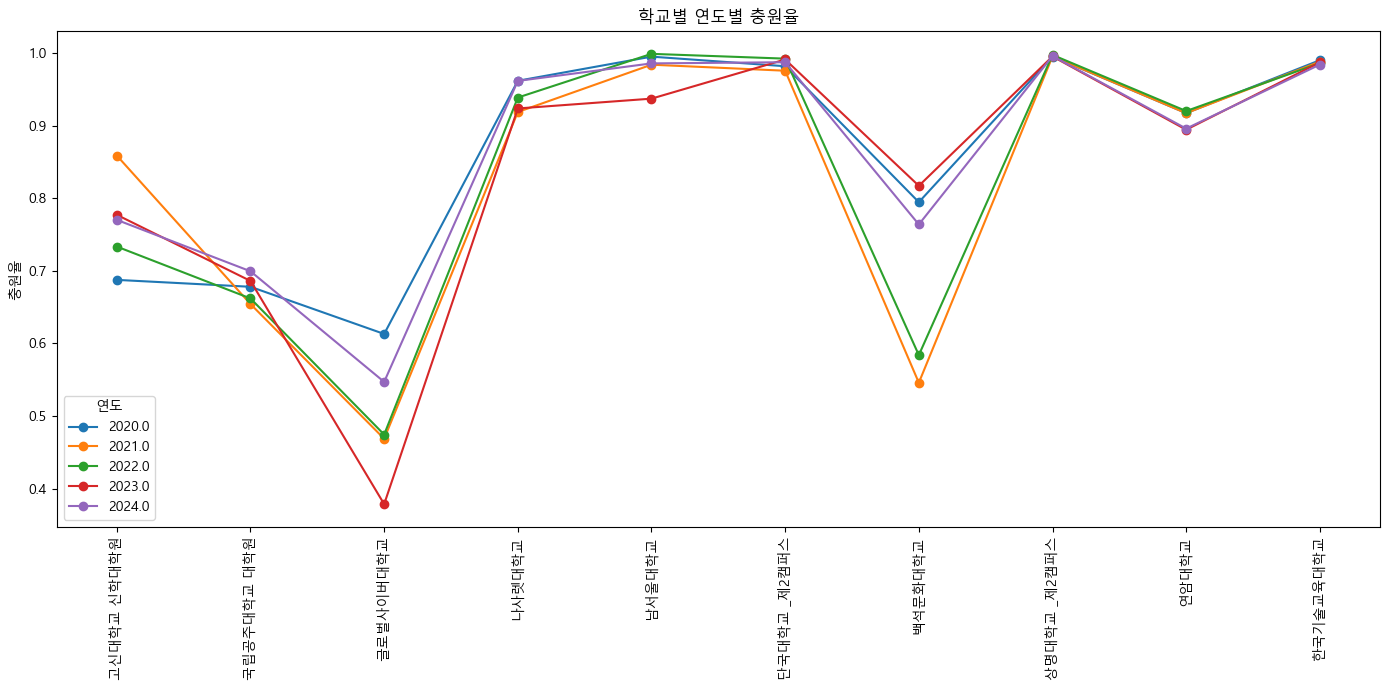

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import warnings
from matplotlib import rcParams

# 1. 경고 메시지 무시
warnings.filterwarnings('ignore')

# 2. 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# CSV 파일 경로 패턴
path_pattern = r"C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_*_filtered.csv"
files = glob.glob(path_pattern)

all_data = []

# 모든 파일 읽고 충원율 계산
for f in files:
    df = pd.read_csv(f)
    # 입학자 / 모집인원 계산
    df['충원율'] = df['입학자'] / df['모집인원']
    # 필요한 열만 선택
    all_data.append(df[['학교명', '충원율', '기준연도']])

# 데이터 합치기
result_df = pd.concat(all_data, ignore_index=True)

# 피벗 테이블로 변환: 학교별 연도별 충원율
pivot_df = result_df.pivot(index='학교명', columns='기준연도', values='충원율')

# 그래프 그리기
plt.figure(figsize=(14,7))
for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker='o', label=year)

plt.xticks(rotation=90)
plt.ylabel('충원율')
plt.title('학교별 연도별 충원율')
plt.legend(title='연도')
plt.tight_layout()
plt.show()


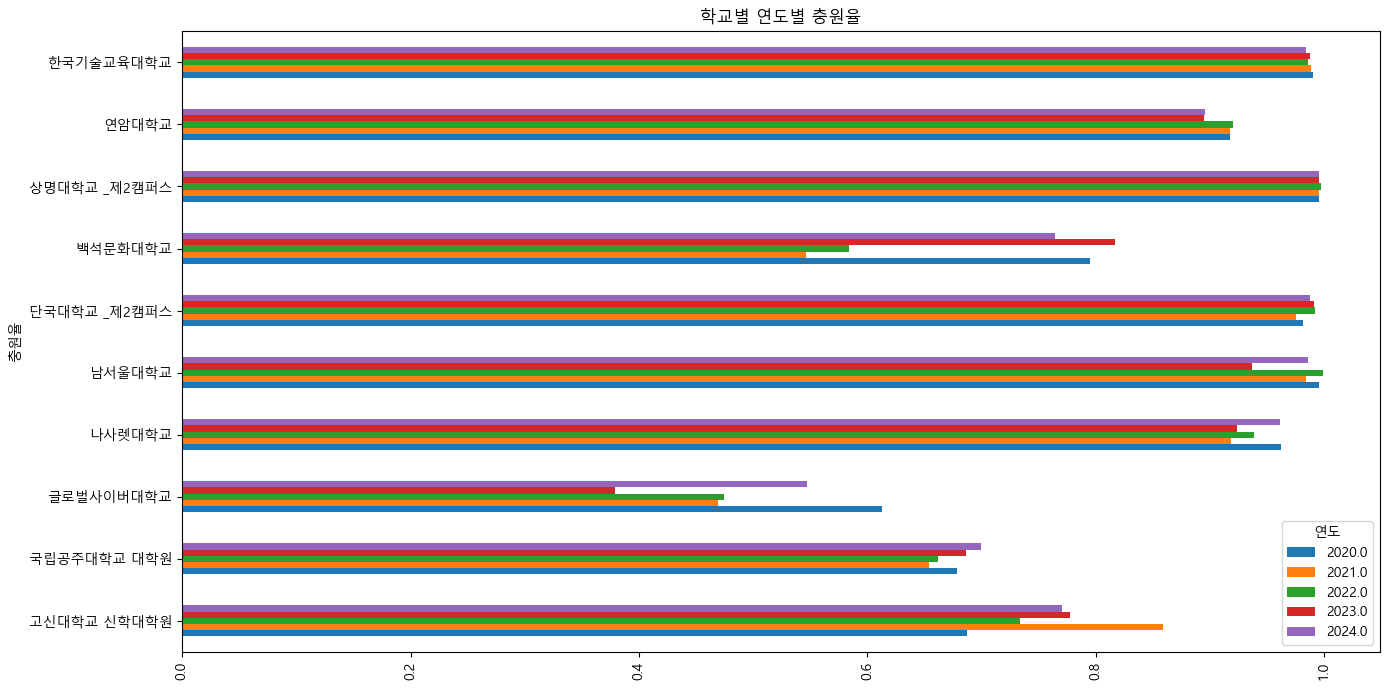

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import warnings

# 1. 경고 메시지 무시
warnings.filterwarnings('ignore')

# 2. 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# CSV 파일 경로 패턴
path_pattern = r"C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_*_filtered.csv"
files = glob.glob(path_pattern)

all_data = []

# 모든 파일 읽고 충원율 계산
for f in files:
    df = pd.read_csv(f)
    # 입학자 / 모집인원 계산
    df['충원율'] = df['입학자'] / df['모집인원']
    # 필요한 열만 선택
    all_data.append(df[['학교명', '충원율', '기준연도']])

# 데이터 합치기
result_df = pd.concat(all_data, ignore_index=True)

# 피벗 테이블로 변환: 학교별 연도별 충원율
pivot_df = result_df.pivot(index='학교명', columns='기준연도', values='충원율')

# 막대 그래프 그리기 (학교별로 5년치 비교)
pivot_df.plot(kind='barh', figsize=(14,7))

plt.ylabel('충원율')
plt.title('학교별 연도별 충원율')
plt.legend(title='연도')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


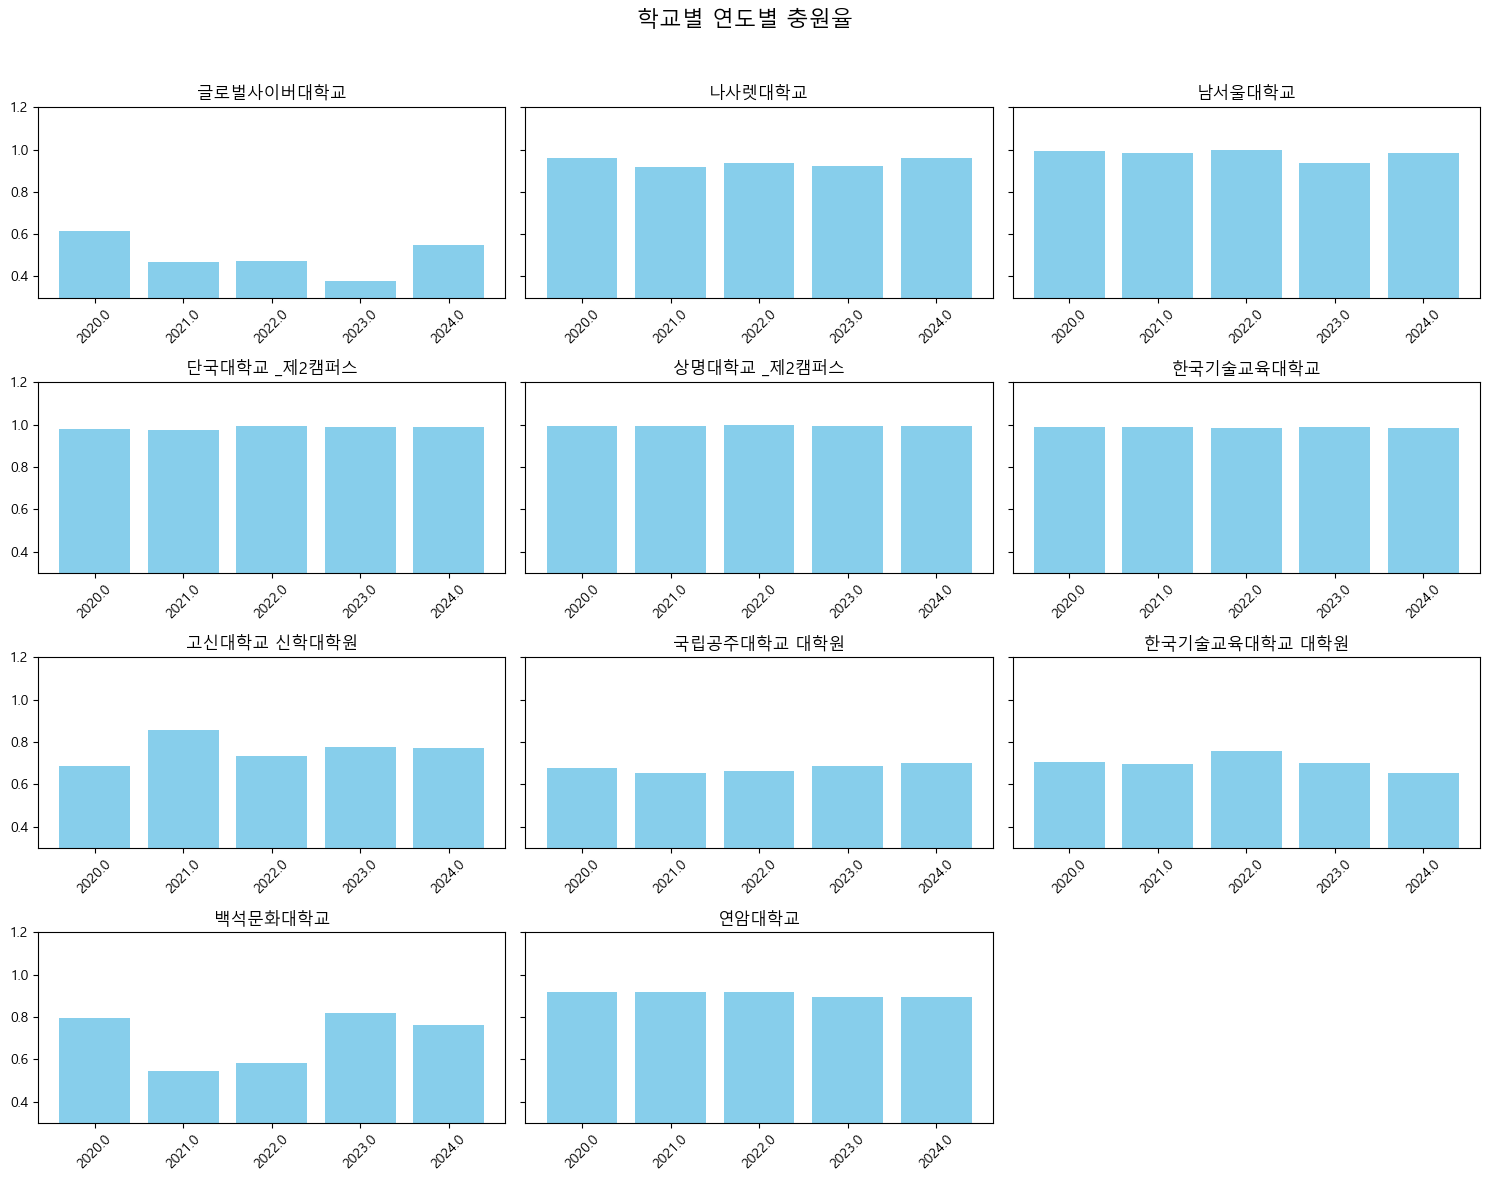

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import warnings

# 1. 경고 메시지 무시
warnings.filterwarnings('ignore')

# 2. 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 경로 패턴
path_pattern = r"C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_*_filtered.csv"
files = glob.glob(path_pattern)

all_data = []

# 모든 파일 읽고 충원율 계산
for f in files:
    df = pd.read_csv(f)
    df['충원율'] = df['입학자'] / df['모집인원']
    all_data.append(df[['학교명', '충원율', '기준연도']])

# 데이터 합치기
result_df = pd.concat(all_data, ignore_index=True)

# 학교 리스트 추출 (11개라고 하셨음)
schools = result_df['학교명'].unique()

# Subplot 개수 자동 계산 (3열 배치)
n = len(schools)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows*3), sharey=True)
axes = axes.flatten()

# 각 학교별 그래프
for i, school in enumerate(schools):
    school_df = result_df[result_df['학교명'] == school]
    axes[i].bar(school_df['기준연도'].astype(str), school_df['충원율'], color='skyblue')
    axes[i].set_title(school)
    axes[i].set_ylim(0.3, 1.2)  # 충원율 0~120% 정도로 고정하면 비교 쉬움
    axes[i].set_xticklabels(school_df['기준연도'].astype(str), rotation=45)

# 남는 subplot 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("학교별 연도별 충원율", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


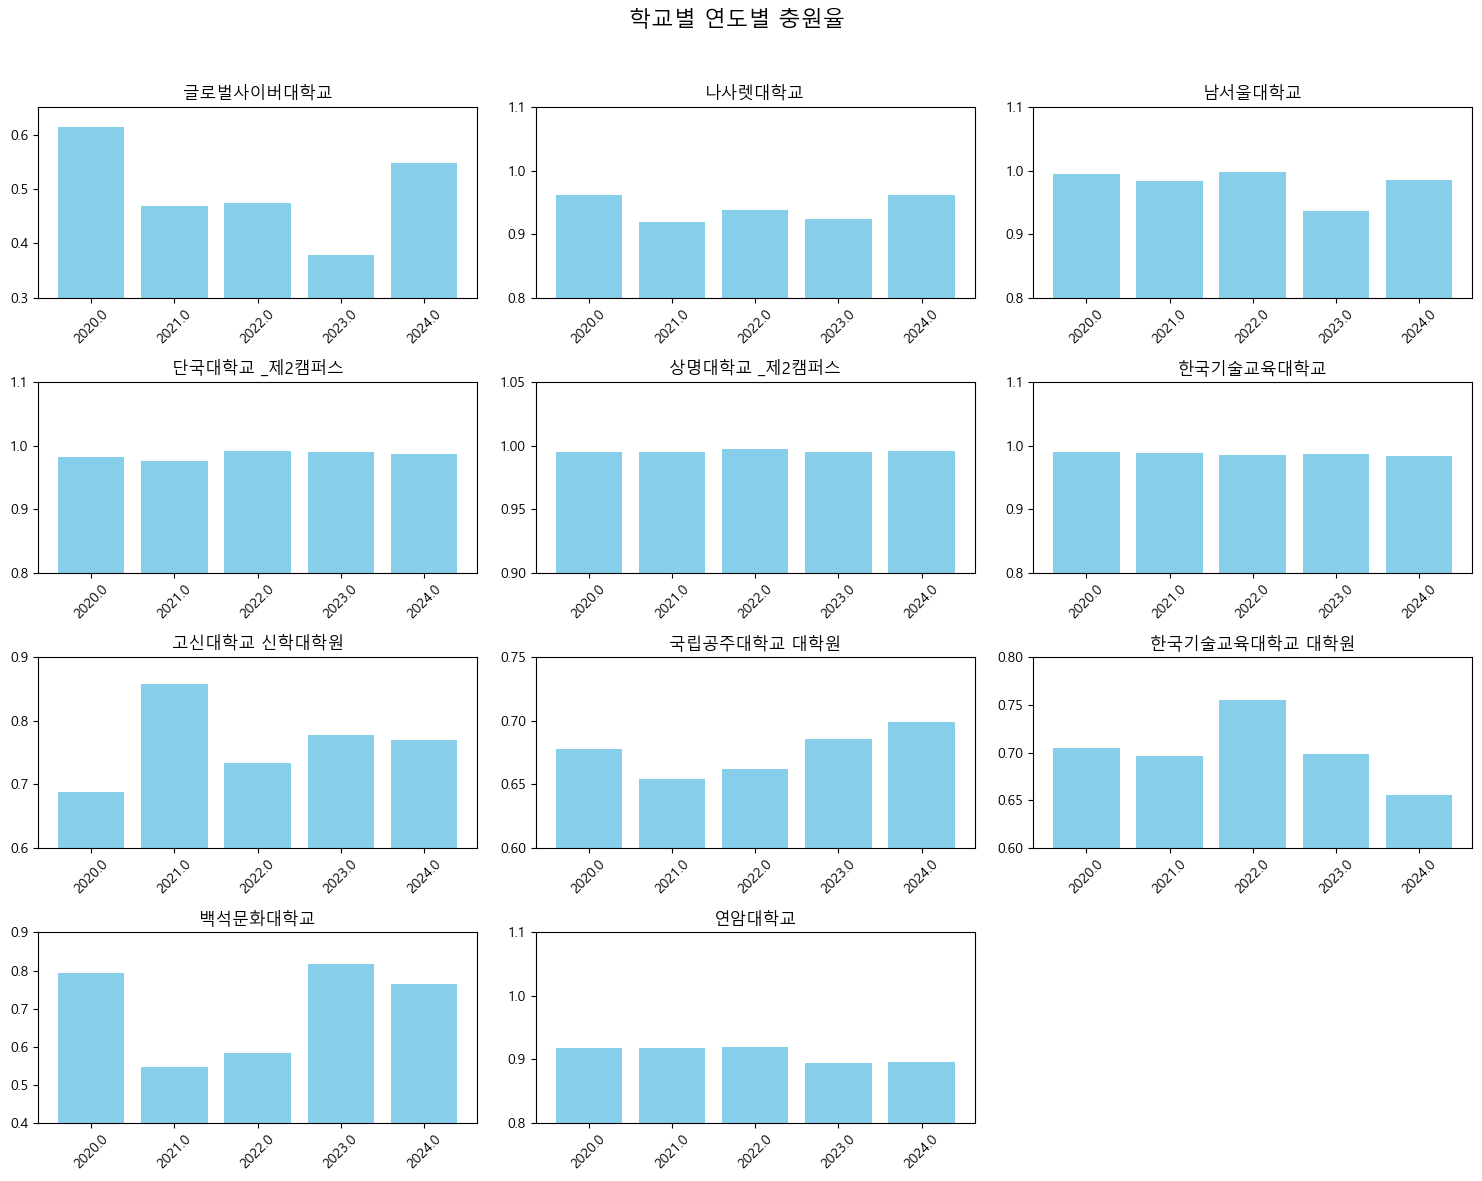

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import warnings

# 1. 경고 메시지 무시
warnings.filterwarnings('ignore')

# 2. 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 경로 패턴
path_pattern = r"C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_*_filtered.csv"
files = glob.glob(path_pattern)

all_data = []

# 모든 파일 읽고 충원율 계산
for f in files:
    df = pd.read_csv(f)
    df['충원율'] = df['입학자'] / df['모집인원']
    all_data.append(df[['학교명', '충원율', '기준연도']])

# 데이터 합치기
result_df = pd.concat(all_data, ignore_index=True)

# 학교 리스트 추출
schools = result_df['학교명'].unique()

# Subplot 개수 자동 계산 (3열 배치)
n = len(schools)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows*3), sharey=False)
axes = axes.flatten()

# ✅ 학교별 y축 범위 지정 (예시: 실제 학교명에 맞게 수정)
ylim_dict = {
    "연암대학교": (0.8, 1.1),
    "백석문화대학교": (0.4, 0.9),
    "국립공주대학교 대학원": (0.6, 0.75),
    "고신대학교 신학대학원": (0.6, 0.9),
    "글로벌사이버대학교": (0.3, 0.65),
    "나사렛대학교": (0.8, 1.1),
    "남서울대학교": (0.8, 1.1),
    "단국대학교 _제2캠퍼스": (0.8, 1.1),
    "상명대학교 _제2캠퍼스": (0.9, 1.05),
    "한국기술교육대학교": (0.8, 1.1),
    "한국기술교육대학교 대학원": (0.6, 0.8),
    # 필요하면 계속 추가
}

# 각 학교별 그래프
for i, school in enumerate(schools):
    school_df = result_df[result_df['학교명'] == school]
    axes[i].bar(school_df['기준연도'].astype(str), school_df['충원율'], color='skyblue')
    axes[i].set_title(school)

    # 학교별 개별 범위 적용 (없으면 기본값 사용)
    if school in ylim_dict:
        axes[i].set_ylim(ylim_dict[school])
    else:
        axes[i].set_ylim(0.3, 1.2)

    axes[i].set_xticklabels(school_df['기준연도'].astype(str), rotation=45)

# 남는 subplot 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("학교별 연도별 충원율", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


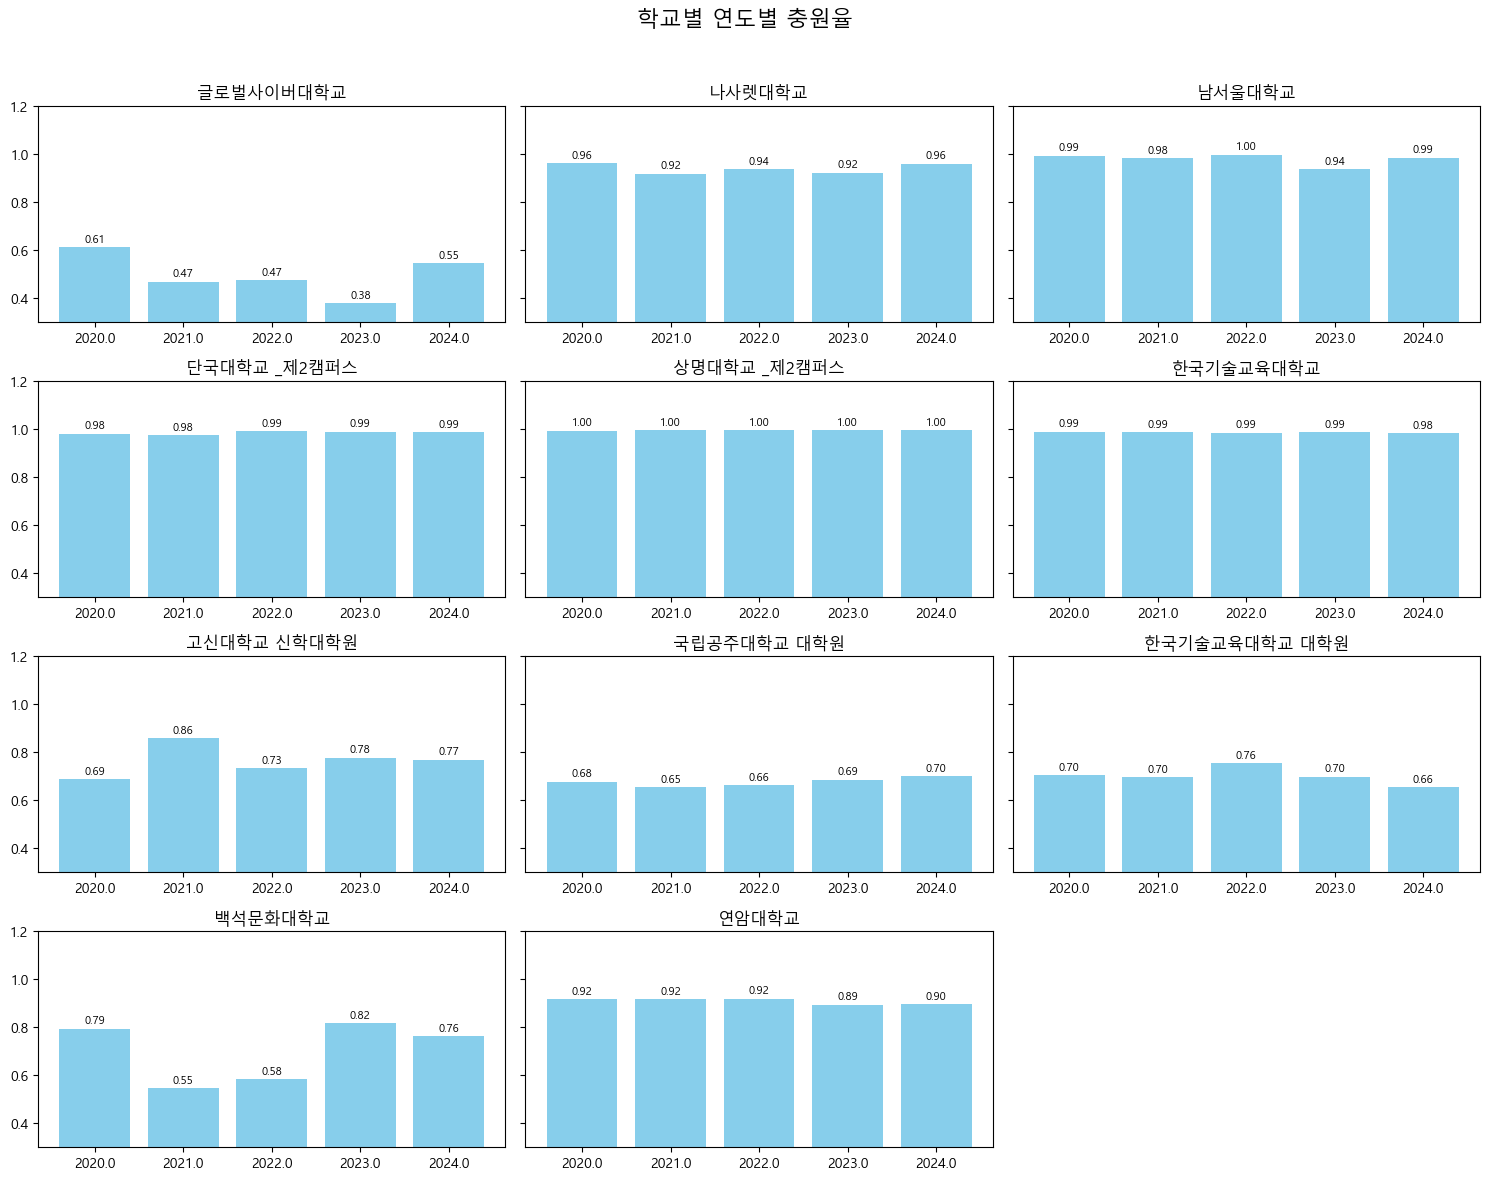

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import warnings

# 1. 경고 메시지 무시
warnings.filterwarnings('ignore')

# 2. 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 경로 패턴
path_pattern = r"C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_*_filtered.csv"
files = glob.glob(path_pattern)

all_data = []

# 모든 파일 읽고 충원율 계산
for f in files:
    df = pd.read_csv(f)
    df['충원율'] = df['입학자'] / df['모집인원']
    all_data.append(df[['학교명', '충원율', '기준연도']])

# 데이터 합치기
result_df = pd.concat(all_data, ignore_index=True)

# 학교 리스트 추출
schools = result_df['학교명'].unique()

# Subplot 개수 자동 계산 (3열 배치)
n = len(schools)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows*3), sharey=True)
axes = axes.flatten()

# 각 학교별 그래프
for i, school in enumerate(schools):
    school_df = result_df[result_df['학교명'] == school]
    bars = axes[i].bar(school_df['기준연도'].astype(str), school_df['충원율'], color='skyblue')

    # 막대 위에 숫자 표시
    for bar in bars:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,  # 막대 가운데
            height + 0.01,                      # 막대 위 살짝 위
            f"{height:.2f}",                    # 소수점 2자리 표시
            ha='center', va='bottom', fontsize=8
        )

    axes[i].set_title(school)
    axes[i].set_ylim(0.3, 1.2)  # 충원율 범위 고정
    axes[i].set_xticklabels(school_df['기준연도'].astype(str), rotation=0)

# 남는 subplot 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("학교별 연도별 충원율", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import pandas as pd
import glob

# 경로 패턴 (와일드카드 포함)
path_pattern = r"C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_*_filtered.csv"

# 패턴에 맞는 파일 리스트 가져오기
files = glob.glob(path_pattern)

# 파일 여러 개라면 concat으로 합치기
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

print(df)

      기준연도       학교종류            학교명  모집인원   입학자
0   2020.0  사이버대학(대학)      글로벌사이버대학교  1535   941
1   2020.0        대학교         나사렛대학교  1407  1353
2   2020.0        대학교         남서울대학교  2340  2328
3   2020.0        대학교   단국대학교 _제2캠퍼스  2566  2519
4   2020.0        대학교   상명대학교 _제2캠퍼스  1410  1403
5   2020.0        대학교      한국기술교육대학교   997   987
6   2020.0      특수대학원    고신대학교 신학대학원   208   143
7   2020.0      일반대학원    국립공주대학교 대학원   854   579
8   2020.0      일반대학원  한국기술교육대학교 대학원   183   129
9   2020.0       전문대학        백석문화대학교  3119  2478
10  2020.0       전문대학          연암대학교   627   575
11  2021.0  사이버대학(대학)      글로벌사이버대학교  1536   720
12  2021.0        대학교         나사렛대학교  1352  1242
13  2021.0        대학교         남서울대학교  2406  2367
14  2021.0        대학교   단국대학교 _제2캠퍼스  2569  2506
15  2021.0        대학교   상명대학교 _제2캠퍼스  1459  1452
16  2021.0        대학교      한국기술교육대학교   998   986
17  2021.0      특수대학원    고신대학교 신학대학원   191   164
18  2021.0      일반대학원    국립공주대학교 대학원   937   613
19  2021.0      일반대학

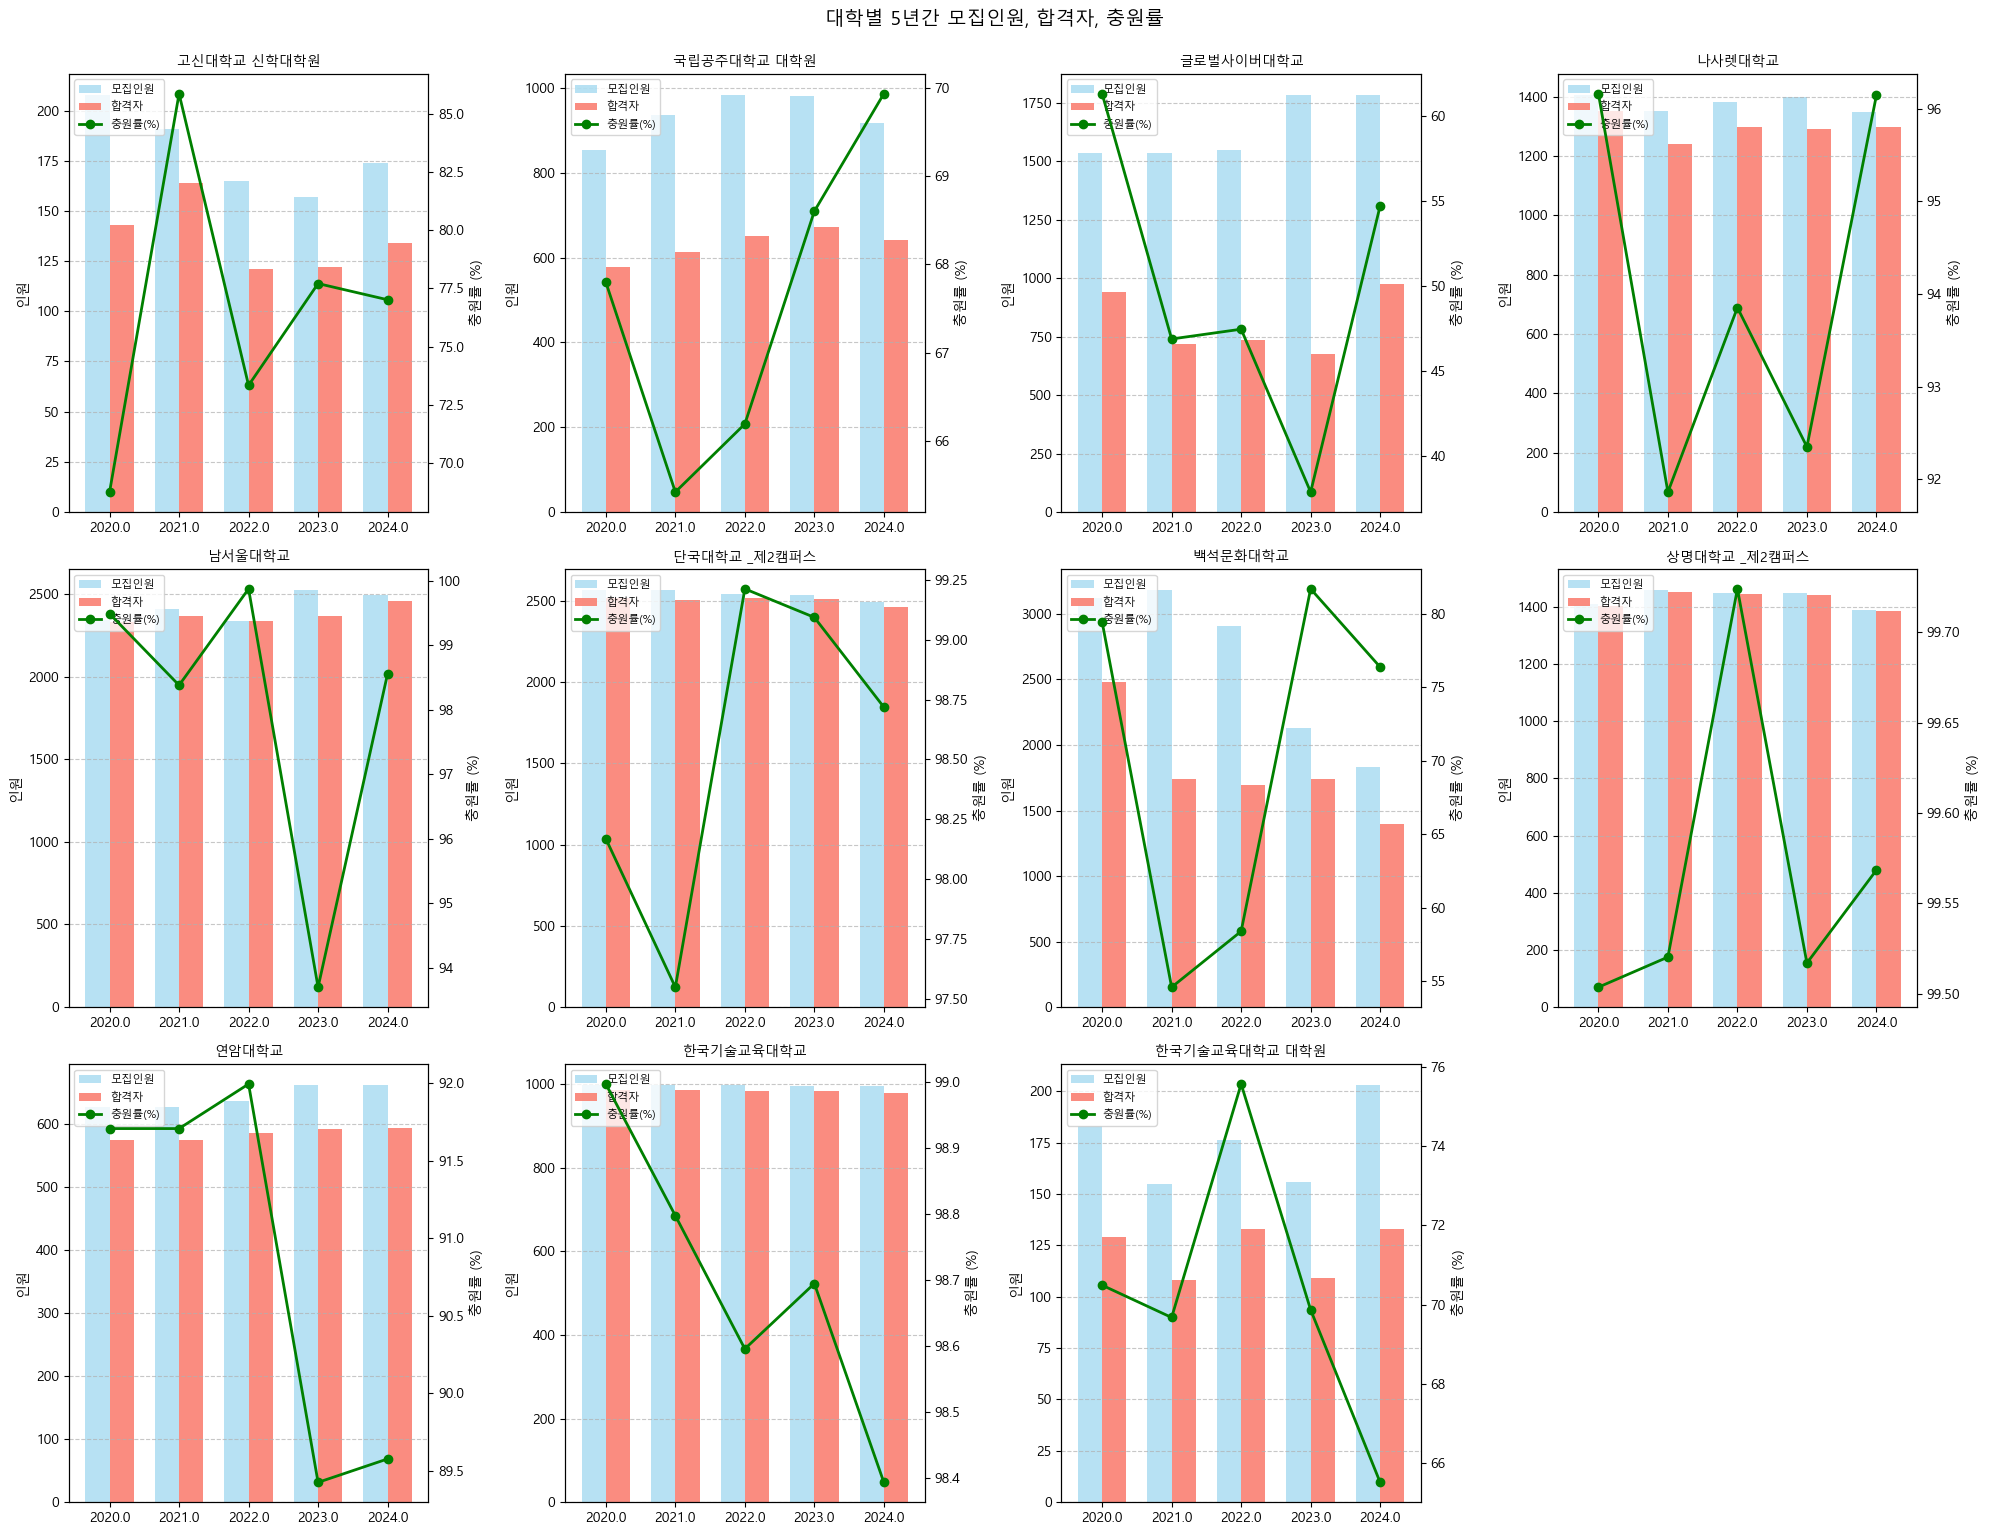

In [8]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import math

# 1. 모든 CSV 파일 읽어오기
path_pattern = r"C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_*_filtered.csv"
files = glob.glob(path_pattern)

# 여러 파일 합치기
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# '대학'만 필터링
universities = df[df['학교종류'].str.contains("대학")]

# 연도별, 학교별 모집인원과 입학자 합계
grouped = universities.groupby(['학교명', '기준연도']).agg({'모집인원':'sum', '입학자':'sum'}).reset_index()
grouped['충원률'] = grouped['입학자'] / grouped['모집인원'] * 100

# 나머지 시각화 코드 그대로 사용 가능
school_list = grouped['학교명'].unique()
num_schools = len(school_list)

cols = 4
rows = math.ceil(num_schools / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()

width = 0.35

for i, school in enumerate(school_list):
    ax1 = axes[i]
    data = grouped[grouped['학교명'] == school]
    x = np.arange(len(data['기준연도']))

    ax1.bar(x - width/2, data['모집인원'], width=width, alpha=0.6, label='모집인원', color='skyblue')
    ax1.bar(x + width/2, data['입학자'], width=width, alpha=0.9, label='합격자', color='salmon')
    ax1.set_xticks(x)
    ax1.set_xticklabels(data['기준연도'])
    ax1.set_ylabel('인원')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.plot(x, data['충원률'], color='green', marker='o', linestyle='-', linewidth=2, label='충원률(%)')
    ax2.set_ylabel('충원률 (%)')

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=8, loc='upper left')

    ax1.set_title(school, fontsize=10)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('대학별 5년간 모집인원, 합격자, 충원률', fontsize=14, y=1.02)
plt.show()


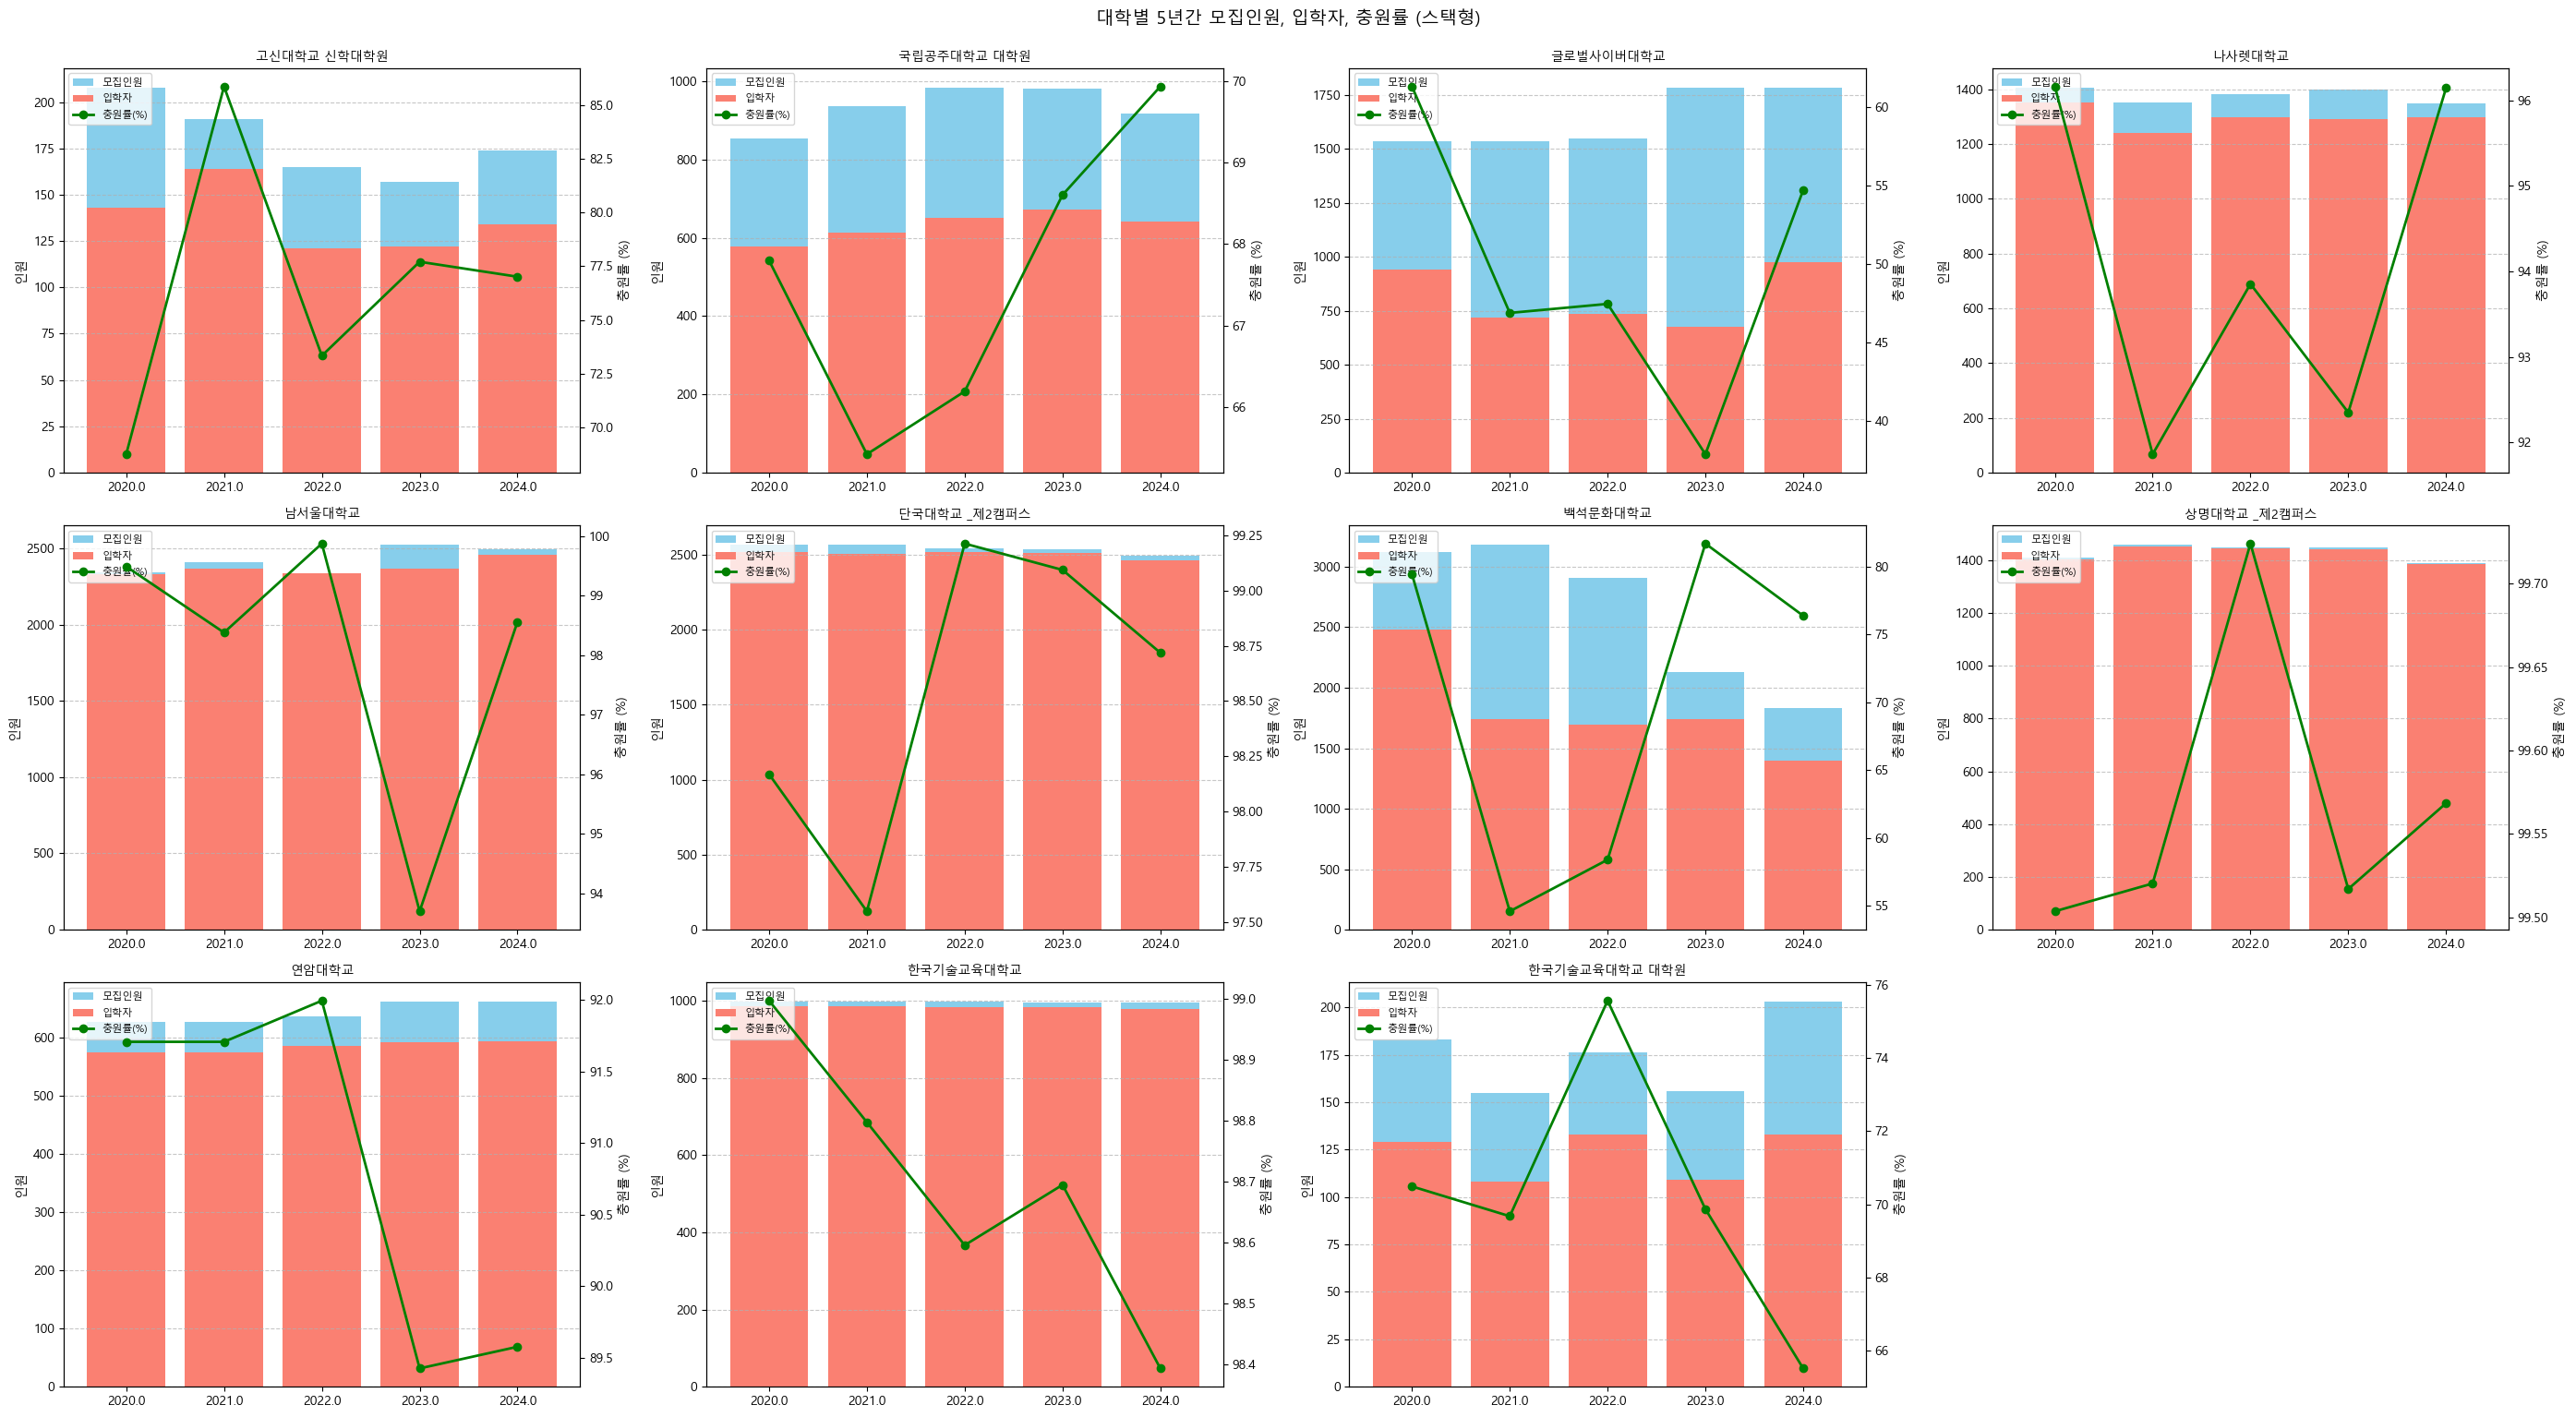

In [13]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import math

# 1. 모든 CSV 파일 읽어오기
path_pattern = r"C:\Users\yeye0\Desktop\천안시\신입생 충원 현황_*_filtered.csv"
files = glob.glob(path_pattern)

# 여러 파일 합치기
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# '대학'만 필터링
universities = df[df['학교종류'].str.contains("대학")]

# 연도별, 학교별 모집인원과 입학자 합계
grouped = universities.groupby(['학교명', '기준연도']).agg({'모집인원':'sum', '입학자':'sum'}).reset_index()
grouped['충원률'] = grouped['입학자'] / grouped['모집인원'] * 100

# 학교 리스트
school_list = grouped['학교명'].unique()
num_schools = len(school_list)

cols = 4
rows = math.ceil(num_schools / cols)

fig, axes = plt.subplots(rows, cols, figsize=(7*cols, 5*rows))
axes = axes.flatten()

for i, school in enumerate(school_list):
    ax1 = axes[i]
    data = grouped[grouped['학교명'] == school]
    x = np.arange(len(data['기준연도']))
    
    # 스택형 막대그래프
    ax1.bar(x, data['모집인원'], label='모집인원', color='skyblue')
    ax1.bar(x, data['입학자'], label='입학자', color='salmon')
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(data['기준연도'])
    ax1.set_ylabel('인원')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 충원률 선 그래프
    ax2 = ax1.twinx()
    ax2.plot(x, data['충원률'], color='green', marker='o', linestyle='-', linewidth=2, label='충원률(%)')
    ax2.set_ylabel('충원률 (%)')

    # 범례 합치기
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=8, loc='upper left')

    ax1.set_title(school, fontsize=10)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('대학별 5년간 모집인원, 입학자, 충원률 (스택형)', fontsize=14, y=1.02)
plt.show()
